<a href="https://colab.research.google.com/github/zahidshaon/Machine-Learning-Based-ETP-Outlet-Monitoring/blob/main/Thesis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre processed 
fire the system

In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.font_manager
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras import metrics
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Read data

In [ ]:
df = pd.read_csv('/content/WQI_s.csv')
df

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


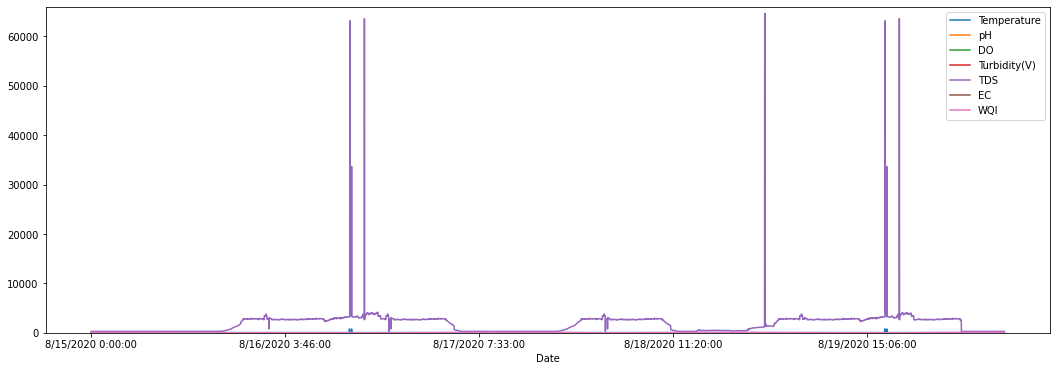

In [ ]:
df.plot('Date', ['Temperature', 'pH','DO','Turbidity(V)','TDS','EC', 'WQI'],figsize=(18,6),ylim=(0,66000))

In [ ]:
df_mean = df.mean()
dataset_train=df.replace(np.nan, df_mean)
dataset_train

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


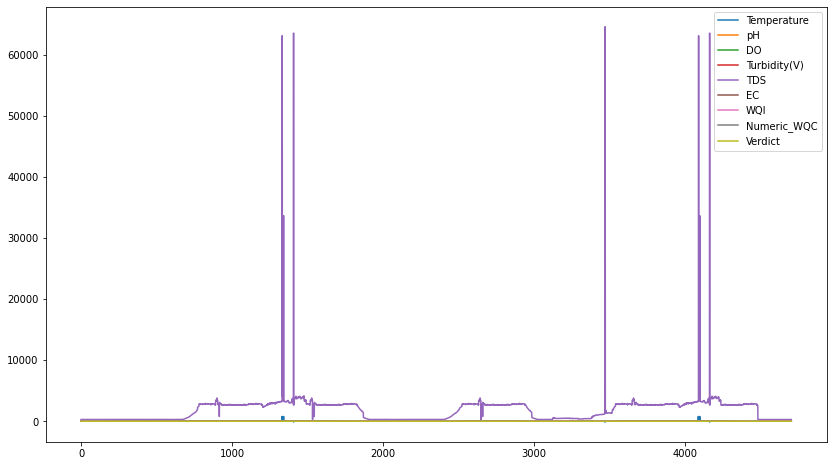

In [ ]:
dataset_train.plot(figsize=(14,8))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe93e468690>,
      dtype=object)

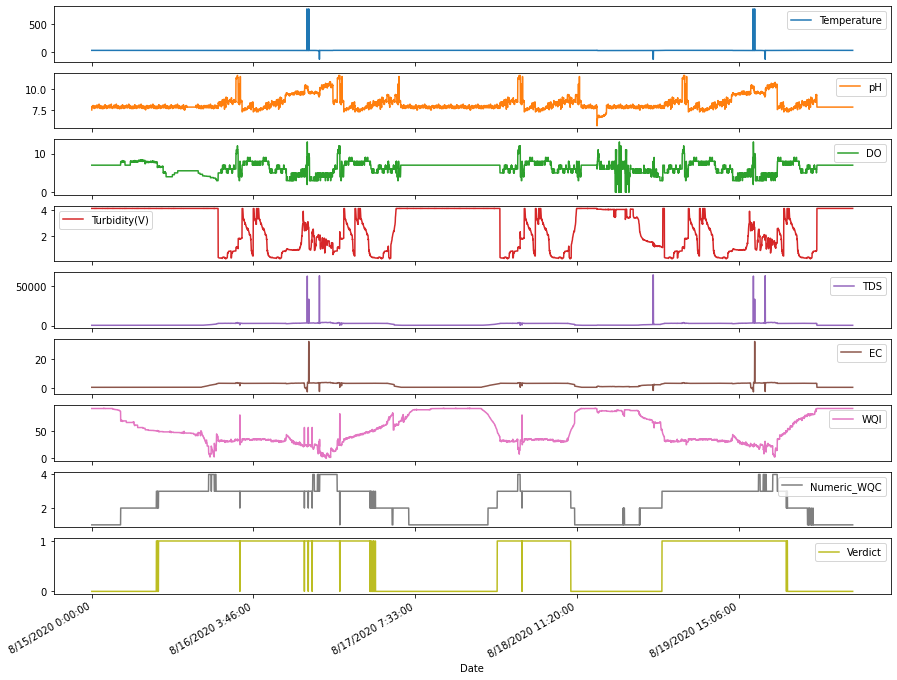

In [ ]:
dataset_train.plot(0, [1,2,3,4,5,6,7,8,9,10], subplots=True, figsize=(15,12))


In [ ]:
print(dataset_train.dtypes)

Date             object
Temperature     float64
pH              float64
DO              float64
Turbidity(V)    float64
TDS             float64
EC              float64
WQI             float64
WQC              object
Numeric_WQC       int64
Verdict           int64
dtype: object


#Data processing

Removing all commas and convert data to matrix shape format.



In [ ]:

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:8]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y %H:%M:%S') for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (4707, 11)
All timestamps == 4707
Featured selected: ['Temperature', 'pH', 'DO', 'Turbidity(V)', 'TDS', 'EC', 'WQI']


In [ ]:
datelist_train

[datetime.datetime(2020, 8, 15, 0, 0),
 datetime.datetime(2020, 8, 15, 0, 1),
 datetime.datetime(2020, 8, 15, 0, 3),
 datetime.datetime(2020, 8, 15, 0, 5),
 datetime.datetime(2020, 8, 15, 0, 6),
 datetime.datetime(2020, 8, 15, 0, 8),
 datetime.datetime(2020, 8, 15, 0, 10),
 datetime.datetime(2020, 8, 15, 0, 11),
 datetime.datetime(2020, 8, 15, 0, 13),
 datetime.datetime(2020, 8, 15, 0, 15),
 datetime.datetime(2020, 8, 15, 0, 16),
 datetime.datetime(2020, 8, 15, 0, 18),
 datetime.datetime(2020, 8, 15, 0, 20),
 datetime.datetime(2020, 8, 15, 0, 21),
 datetime.datetime(2020, 8, 15, 0, 23),
 datetime.datetime(2020, 8, 15, 0, 25),
 datetime.datetime(2020, 8, 15, 0, 26),
 datetime.datetime(2020, 8, 15, 0, 28),
 datetime.datetime(2020, 8, 15, 0, 30),
 datetime.datetime(2020, 8, 15, 0, 31),
 datetime.datetime(2020, 8, 15, 0, 33),
 datetime.datetime(2020, 8, 15, 0, 35),
 datetime.datetime(2020, 8, 15, 0, 36),
 datetime.datetime(2020, 8, 15, 0, 38),
 datetime.datetime(2020, 8, 15, 0, 40),
 datet

In [ ]:
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)

In [ ]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')
dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (4707, 7).


array([[ 33.44,   7.55,   7.  , ..., 289.  ,   0.78,  91.19],
       [ 33.44,   7.94,   7.  , ..., 291.  ,   0.79,  91.19],
       [ 33.44,   7.88,   7.  , ..., 291.  ,   0.79,  91.19],
       ...,
       [ 33.57,   7.88,   7.  , ..., 284.4 ,   0.77,  91.26],
       [ 33.57,   7.88,   7.  , ..., 284.39,   0.77,  91.26],
       [ 33.57,   7.88,   7.  , ..., 284.39,   0.77,  91.26]])

In [ ]:
#installing mglearn -- just takes 5s to install -- it's a built in function to understand the difference between the different scalers.
!pip install mglearn

     |████████████████████████████████| 542kB 5.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9eaf866860cce45f3915850b18751ec1a3425f5350b852ca1438ee8466cf0c8f
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


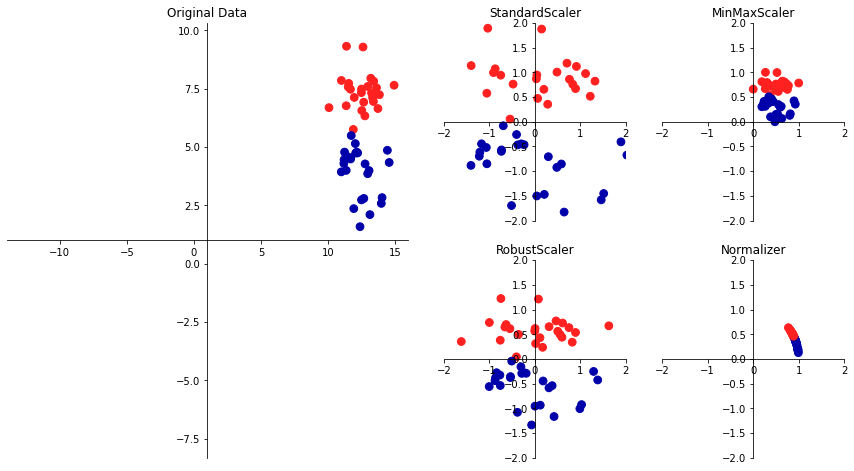

In [ ]:
import mglearn
#this is just a built in thing to understand the difference between the different scalers
mglearn.plots.plot_scaling()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 6:7])

array([[1.40875528],
       [1.40875528],
       [1.40875528],
       ...,
       [1.41140702],
       [1.41140702],
       [1.41140702]])

In [ ]:

# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 3  # Number of days we want top predict into the future
n_past = 5    # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 6:7])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (4700, 5, 6).
y_train shape == (4700, 1, 1).


In [ ]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)

#Create a model Training

Building the LSTM based Neural Network

In [ ]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
import tensorflow as tf

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()
 
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
model.add(Dropout(0.5)) 
# Adding 2nd LSTM layer
model.add(LSTM(units=32, return_sequences=False))

# Adding Dropout
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 64)             18176     
_________________________________________________________________
dropout (Dropout)            (None, 5, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 25)                825       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0

Start training

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,
                    shuffle=True,
                    epochs=100,
                    callbacks=[es, rlr, mcp, tb],
                    validation_split=0.2 ,
                    validation_data=(X_train, y_train),
                    verbose=1,
                    batch_size=64)

Epoch 1/100
59/59 [==============================] - 5s 33ms/step - loss: 0.3366 - accuracy: 0.6204 - val_loss: 0.1844 - val_accuracy: 0.7032

Epoch 00001: val_loss improved from inf to 0.18438, saving model to weights.h5
Epoch 2/100
59/59 [==============================] - 1s 10ms/step - loss: 0.2021 - accuracy: 0.6957 - val_loss: 0.1608 - val_accuracy: 0.7181

Epoch 00002: val_loss improved from 0.18438 to 0.16076, saving model to weights.h5
Epoch 3/100
59/59 [==============================] - 1s 10ms/step - loss: 0.1863 - accuracy: 0.7154 - val_loss: 0.1598 - val_accuracy: 0.6851

Epoch 00003: val_loss improved from 0.16076 to 0.15980, saving model to weights.h5
Epoch 4/100
59/59 [==============================] - 1s 12ms/step - loss: 0.1828 - accuracy: 0.7061 - val_loss: 0.1125 - val_accuracy: 0.7032

Epoch 00004: val_loss improved from 0.15980 to 0.11246, saving model to weights.h5
Epoch 5/100
59/59 [==============================] - 1s 10ms/step - loss: 0.1772 - accuracy: 0.7252 

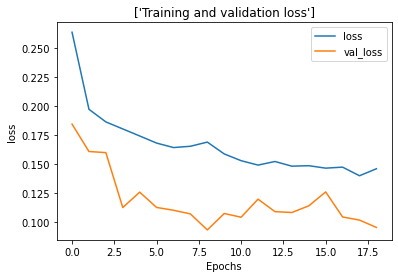

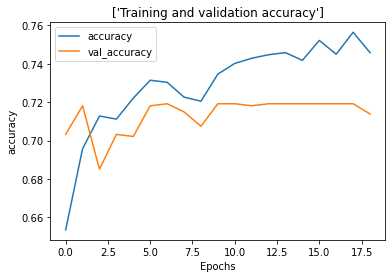

[0.2635551691055298, 0.19713571667671204, 0.18627196550369263, 0.18021968007087708, 0.1741558462381363, 0.16802212595939636, 0.16416479647159576, 0.16527153551578522, 0.16886352002620697, 0.15867166221141815, 0.15283890068531036, 0.14904500544071198, 0.15214277803897858, 0.14811532199382782, 0.1485270857810974, 0.14641496539115906, 0.1472894549369812, 0.13986662030220032, 0.14588184654712677]
[0.18438346683979034, 0.1607614904642105, 0.1597956120967865, 0.11245817691087723, 0.12573912739753723, 0.11254376918077469, 0.11013708263635635, 0.10697683691978455, 0.09317457675933838, 0.10733269900083542, 0.1041141152381897, 0.11970437318086624, 0.10893545299768448, 0.1081857830286026, 0.11391869932413101, 0.1259242743253708, 0.10433583706617355, 0.10166507959365845, 0.09531430900096893]
[0.6534574627876282, 0.6957446932792664, 0.7127659320831299, 0.7111701965332031, 0.7220744490623474, 0.7313829660415649, 0.7303191423416138, 0.722606360912323, 0.7204787135124207, 0.7345744967460632, 0.7401595

In [ ]:
def plot_graphs(history, string):
  plt.title(['Training and validation '+string])
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "loss")
plot_graphs(history, "accuracy")
print(history.history['loss'])
print(history.history['val_loss'])

print(history.history['accuracy'])
print(history.history['val_accuracy'])

#Make future predictions

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date().ctime())

In [ ]:
datelist_future


[Timestamp('2020-08-20 10:43:00', freq='D'),
 Timestamp('2020-08-21 10:43:00', freq='D'),
 Timestamp('2020-08-22 10:43:00', freq='D')]

In [ ]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [ ]:
predictions_future.shape

(3, 1)

In [ ]:
predictions_train.shape

(4695, 1)

In [ ]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.datetime)
    '''
    return datetime.strptime(x.strftime('%m/%d/%Y %H:%M:%S'), '%m/%d/%Y %H:%M:%S')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)


 Make predictions for future dates

In [ ]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['WQI']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['WQI']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [ ]:
PREDICTION_TRAIN=round(PREDICTION_TRAIN)
PREDICTION_TRAIN

,WQI
2020-08-15 00:20:00,73.0
2020-08-15 00:21:00,73.0
2020-08-15 00:23:00,73.0
2020-08-15 00:25:00,73.0
2020-08-15 00:26:00,73.0
...,...
2020-08-20 10:36:00,73.0
2020-08-20 10:38:00,73.0
2020-08-20 10:40:00,73.0
2020-08-20 10:41:00,73.0


In [ ]:
PREDICTION_TRAIN.shape

(4695, 1)

In [ ]:
PREDICTIONS_FUTURE=round(PREDICTIONS_FUTURE)

In [ ]:
PREDICTIONS_FUTURE

,WQI
2020-08-20 10:43:00,73.0
2020-08-21 10:43:00,73.0
2020-08-22 10:43:00,73.0


In [ ]:
PREDICTIONS_FUTURE.shape

(3, 1)

In [ ]:
plt.ion()

Visualize the Predictions

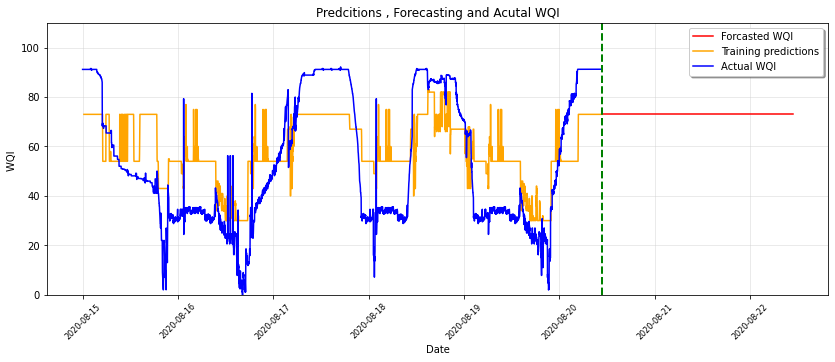

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '8/15/2020 00:00:00'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['WQI'], color='r', label='Forcasted WQI')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['WQI'], color='b', label='Actual WQI')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions , Forecasting and Acutal WQI', family='Arial', fontsize=12)
plt.xlabel('Date', family='Arial', fontsize=10)
plt.ylabel('WQI ', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
ax = plt.gca()
ax.set_ylim([0,110])
plt.show()


Evaluating Time Forcasting's prediction

In [ ]:
total_rmse = 0
for i in range(len(PREDICTION_TRAIN)-3):

        rmse = np.sqrt(mean_squared_error(PREDICTION_TRAIN[i:i+3], PREDICTIONS_FUTURE))
        rmse=rmse*6
        print('t+%d RMSE: %f' % ((i+5), rmse))
        total_rmse += rmse

t+5 RMSE: 0.000000
t+6 RMSE: 0.000000
t+7 RMSE: 0.000000
t+8 RMSE: 0.000000
t+9 RMSE: 0.000000
t+10 RMSE: 0.000000
t+11 RMSE: 0.000000
t+12 RMSE: 0.000000
t+13 RMSE: 0.000000
t+14 RMSE: 0.000000
t+15 RMSE: 0.000000
t+16 RMSE: 0.000000
t+17 RMSE: 0.000000
t+18 RMSE: 0.000000
t+19 RMSE: 0.000000
t+20 RMSE: 0.000000
t+21 RMSE: 0.000000
t+22 RMSE: 0.000000
t+23 RMSE: 0.000000
t+24 RMSE: 0.000000
t+25 RMSE: 0.000000
t+26 RMSE: 0.000000
t+27 RMSE: 0.000000
t+28 RMSE: 0.000000
t+29 RMSE: 0.000000
t+30 RMSE: 0.000000
t+31 RMSE: 0.000000
t+32 RMSE: 0.000000
t+33 RMSE: 0.000000
t+34 RMSE: 0.000000
t+35 RMSE: 0.000000
t+36 RMSE: 0.000000
t+37 RMSE: 0.000000
t+38 RMSE: 0.000000
t+39 RMSE: 0.000000
t+40 RMSE: 0.000000
t+41 RMSE: 0.000000
t+42 RMSE: 0.000000
t+43 RMSE: 0.000000
t+44 RMSE: 0.000000
t+45 RMSE: 0.000000
t+46 RMSE: 0.000000
t+47 RMSE: 0.000000
t+48 RMSE: 0.000000
t+49 RMSE: 0.000000
t+50 RMSE: 0.000000
t+51 RMSE: 0.000000
t+52 RMSE: 0.000000
t+53 RMSE: 0.000000
t+54 RMSE: 0.000000
t+55 

In [ ]:
print('total rmse: ', total_rmse)
print('actual acc:',(total_rmse/(len(PREDICTION_TRAIN))) ,'%')

total rmse:  429173.5493080616
actual acc: 91.41076662578521 %


In [ ]:
# Using sklearn
from sklearn.metrics import r2_score
print(r2_score(PREDICTION_TRAIN[i:i+3], PREDICTIONS_FUTURE))

1.0


#Walk Forward Validation

Using keras models with scikit-learn pipelines

In [ ]:
series= PREDICTION_TRAIN
series

,WQI
2020-08-15 00:20:00,73.0
2020-08-15 00:21:00,73.0
2020-08-15 00:23:00,73.0
2020-08-15 00:25:00,73.0
2020-08-15 00:26:00,73.0
...,...
2020-08-20 10:36:00,73.0
2020-08-20 10:38:00,73.0
2020-08-20 10:40:00,73.0
2020-08-20 10:41:00,73.0


In [ ]:
# split data into train and test
X = series.values   # X is still a column vector with 36 rows
print(X)

[[73.]
 [73.]
 [73.]
 ...
 [73.]
 [73.]
 [73.]]


In [ ]:
series1=PREDICTIONS_FUTURE

In [ ]:
Y= series1.values

In [ ]:
#X = dataset
train, test = X[:-1502], Y[-1502:]
train

array([[73.],
       [73.],
       [73.],
       ...,
       [73.],
       [72.],
       [73.]], dtype=float32)

In [ ]:
test

array([[73.],
       [73.],
       [73.]], dtype=float32)

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
#rmse=rmse/3
print('RMSE: %.3f' % (rmse))

RMSE: 0.000
